In [1]:
import os
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import yaml
from sklearn.model_selection import train_test_split
import pandas as pd

# Pytorch #
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from datetime import datetime

# Ensure the src directory is in sys.path
path_src = '../src'
if path_src not in sys.path:
    sys.path.insert(0,path_src)

# Corrected imports based on your src directory
from preprocessing import load_from_parquet

In [2]:
import sys
sys.path


['../src',
 '/users/pk21271/msciproject/bristol-tth-transformer-msc_project/bristol-tth-transformer-msc_project/notebooks',
 '',
 '/cvmfs/grid.cern.ch/alma9-ui-test/usr/lib64/python3.9/site-packages',
 '/cvmfs/grid.cern.ch/alma9-ui-test/usr/lib/python3.9/site-packages',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python312.zip',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python3.12',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python3.12/lib-dynload',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python3.12/site-packages']

## Start

In [3]:
# Load parquet files

path = '/cephfs/dice/projects/CMS/Hinv/ml_datasets_ul_241111/ml_inputs_UL2018/{dataset}.parquet' # This is the newer datasets

# Load the datasets

datasets = [
    # Signal 0
    'ttH_HToInvisible_M125', 

    # ttbar processes 1
    'TTToSemiLeptonic',
    'TTTo2L2Nu',
    'TTToHadronic',

    # Z+jets processes 2
    'ZJetsToNuNu_HT-100To200',
    'ZJetsToNuNu_HT-200To400',
    'ZJetsToNuNu_HT-400To600',
    'ZJetsToNuNu_HT-600To800',
    'ZJetsToNuNu_HT-800To1200',
    'ZJetsToNuNu_HT-1200To2500',
    'ZJetsToNuNu_HT-2500ToInf',

    # W+jets processes 2
    'WJetsToLNu_HT-70To100',
    'WJetsToLNu_HT-100To200',
    'WJetsToLNu_HT-200To400',
    'WJetsToLNu_HT-400To600',
    'WJetsToLNu_HT-600To800',
    'WJetsToLNu_HT-800To1200',
    'WJetsToLNu_HT-1200To2500',
    'WJetsToLNu_HT-2500ToInf'
]

files = [
    path.format(dataset=dataset)
    for dataset in datasets
]

In [4]:
# df = load_from_parquet(files)

In [5]:
# Define class mappings
class_mappings = {
    'ttH_HToInvisible_M125': 0,  # Signal
    'TTTo': 1,                   # ttbar
    'ZJetsToNuNu': 2,           # Z+jets
    'WJetsToLNu': 2,            # W+jets
}

# Initialize class column
df['class'] = -1

# Assign classes based on dataset patterns
for pattern, class_label in class_mappings.items():
    df.loc[df["dataset"].str.contains(pattern), "class"] = class_label

NameError: name 'df' is not defined

In [ ]:
# Save the df to a new parquet file in location x 

df.to_parquet('/home/pk21271/prep_data/raw_ttH_ttbar_jets/df.parquet')

NameError: name 'df' is not defined

# From here

In [6]:
df = pd.read_parquet('/home/pk21271/prep_data/raw_ttH_ttbar_jets/df.parquet')

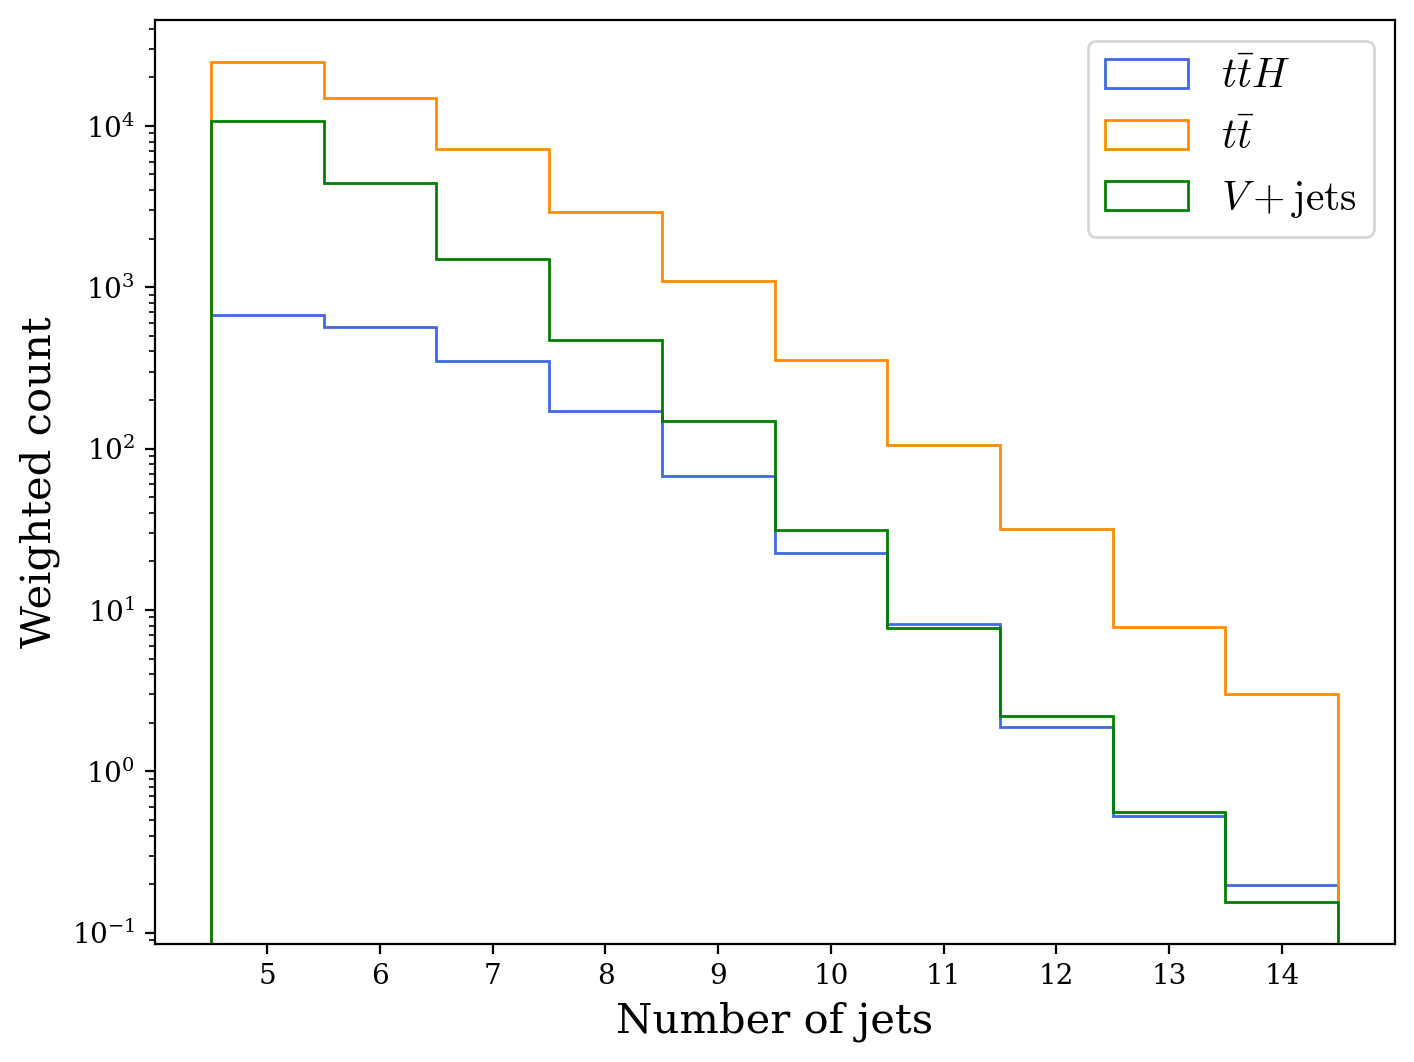

In [8]:
# Plot the histogram of the number of jets of each class

bins = np.arange(4.5, 15.5, 1)  


# Use LaTeX-style fonts without requiring a LaTeX installation
# plt.style.use('science')

plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

# bins=10
plt.figure(figsize=(8, 6), dpi=200)

plt.hist(df[df['class'] == 0]['ncleanedJet'], bins=bins, linewidth=1, color='royalblue', label= r'$t\bar{t}H$', histtype='step', weights = df[df['class'] == 0]['weight_nominal']*200000)
plt.hist(df[df['class'] == 1]['ncleanedJet'], bins=bins, linewidth=1, color='darkorange', label= r'$t\bar{t}$', histtype='step', weights = df[df['class'] == 1]['weight_nominal']*200000)
plt.hist(df[df['class'] == 2]['ncleanedJet'], bins=bins, linewidth=1, color='g', label= r'$V + \text{jets}$', histtype='step', weights = df[df['class'] == 2]['weight_nominal']*200000)

# plt.hist(df[df['class'] == 0]['ncleanedJet'], bins=bins, linewidth=2, color='royalblue', label= r'$t\bar{t}H$', histtype='step', density=True)
# plt.hist(df[df['class'] == 1]['ncleanedJet'], bins=bins, linewidth=2, color='darkorange', label= r'$t\bar{t}$', histtype='step', density=True)
# plt.hist(df[df['class'] == 2]['ncleanedJet'], bins=bins, linewidth=2, color='g', label= r'$V + \text{jets}$', histtype='step', density=True)
# plt.yscale('log')
plt.xlabel('Number of jets', fontsize=15)
plt.ylabel('Weighted count', fontsize=15)
plt.yscale('log')
plt.xticks(np.arange(5, 15, 1))  # Ensure x-axis ticks are properly placed
plt.legend(fontsize=15)


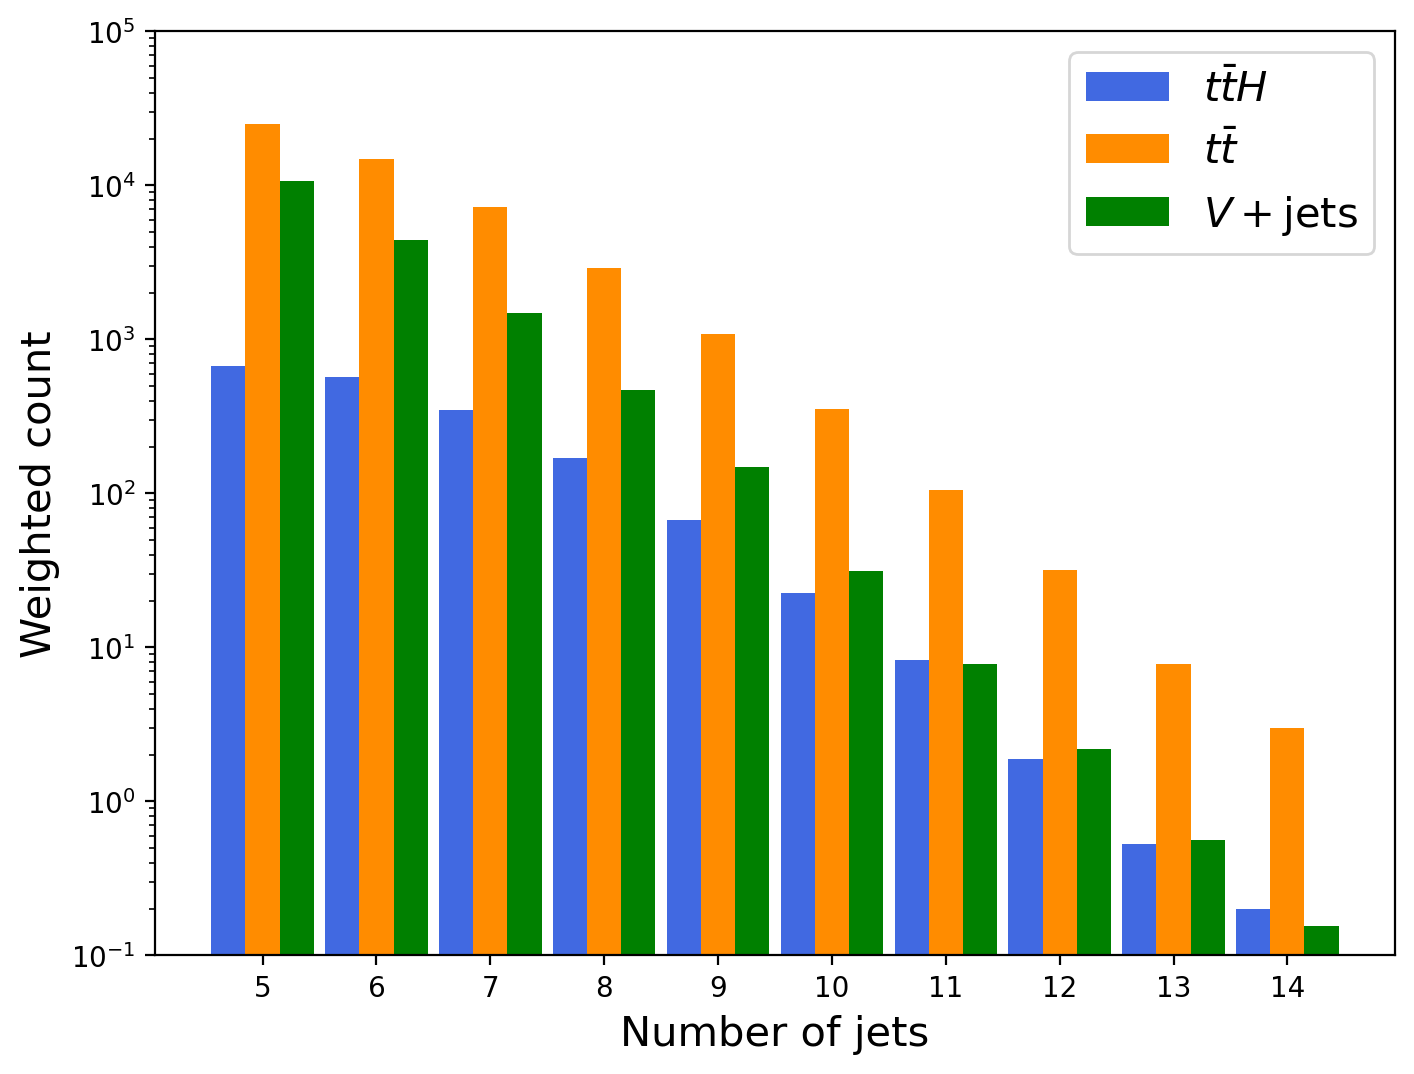

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins
bins = np.arange(4.5, 15.5, 1)  # Bin edges

# Compute histogram values for each class
hist_ttH, _ = np.histogram(df[df['class'] == 0]['ncleanedJet'], bins=bins, weights=df[df['class'] == 0]['weight_nominal'] * 200000)
hist_tt, _ = np.histogram(df[df['class'] == 1]['ncleanedJet'], bins=bins, weights=df[df['class'] == 1]['weight_nominal'] * 200000)
hist_Vjets, _ = np.histogram(df[df['class'] == 2]['ncleanedJet'], bins=bins, weights=df[df['class'] == 2]['weight_nominal'] * 200000)

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2  # Midpoints of bins

# Define bar width and offsets for clarity
bar_width = 0.3  # Adjust bar width
offset = 0.3  # Shift each bar slightly to prevent overlap

plt.figure(figsize=(8, 6), dpi=200)

# Bar plots
plt.bar(bin_centers - offset, hist_ttH, width=bar_width, color='royalblue', label=r'$t\bar{t}H$', alpha=1)
plt.bar(bin_centers, hist_tt, width=bar_width, color='darkorange', label=r'$t\bar{t}$', alpha=1)
plt.bar(bin_centers + offset, hist_Vjets, width=bar_width, color='g', label=r'$V + \text{jets}$', alpha=1)


plt.xlabel('Number of jets', fontsize=15)
plt.ylabel('Weighted count', fontsize=15)
plt.yscale('log')
plt.ylim(1e-1, 1e5)  # Adjust y-axis limits
plt.xticks(np.arange(5, 15, 1))  # Ensure x-axis ticks are properly placed
plt.legend(fontsize=15)

# Labels and F


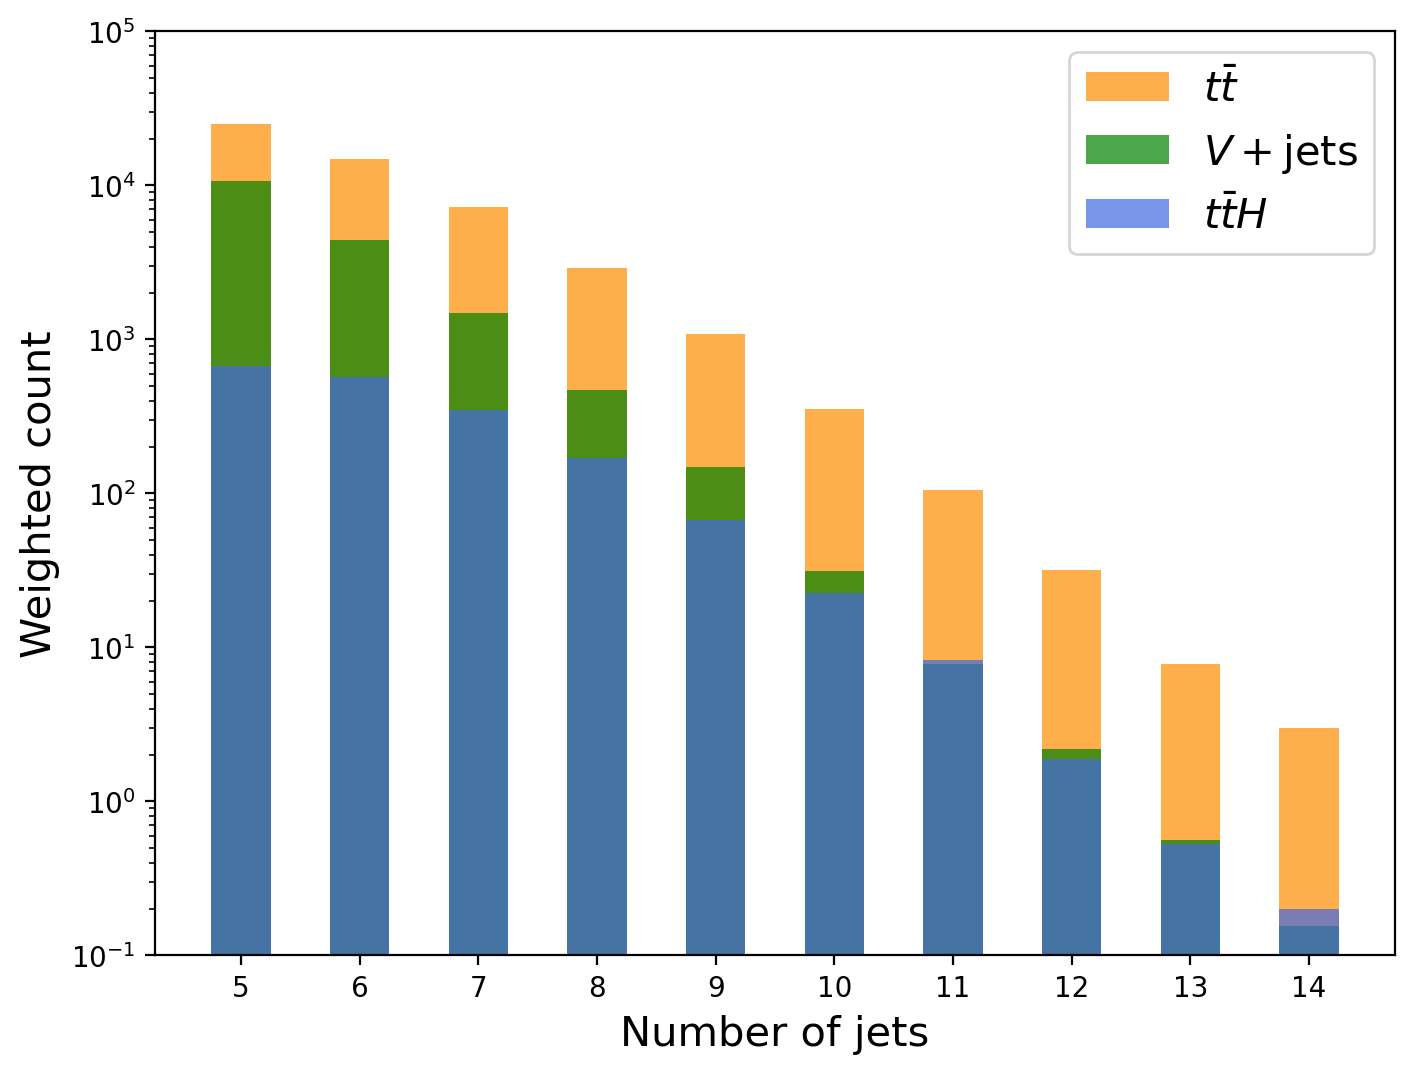

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins
bins = np.arange(4.5, 15.5, 1)  # Bin edges

# Compute histogram values for each class
hist_ttH, _ = np.histogram(df[df['class'] == 0]['ncleanedJet'], bins=bins, weights=df[df['class'] == 0]['weight_nominal'] * 200000)
hist_tt, _ = np.histogram(df[df['class'] == 1]['ncleanedJet'], bins=bins, weights=df[df['class'] == 1]['weight_nominal'] * 200000)
hist_Vjets, _ = np.histogram(df[df['class'] == 2]['ncleanedJet'], bins=bins, weights=df[df['class'] == 2]['weight_nominal'] * 200000)

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2  # Midpoints of bins

# Define bar width and offsets for clarity
bar_width = 0.5  # Adjust bar width
offset = 0  # Shift each bar slightly to prevent overlap

plt.figure(figsize=(8, 6), dpi=200)

# Bar plots
plt.bar(bin_centers, hist_tt, width=bar_width, color='darkorange', label=r'$t\bar{t}$', alpha=0.7)
plt.bar(bin_centers + offset, hist_Vjets, width=bar_width, color='g', label=r'$V + \text{jets}$', alpha=0.7)
plt.bar(bin_centers - offset, hist_ttH, width=bar_width, color='royalblue', label=r'$t\bar{t}H$', alpha=0.7)



plt.xlabel('Number of jets', fontsize=15)
plt.ylabel('Weighted count', fontsize=15)
plt.yscale('log')
plt.ylim(1e-1, 1e5)  # Adjust y-axis limits
plt.xticks(np.arange(5, 15, 1))  # Ensure x-axis ticks are properly placed
plt.legend(fontsize=15)

# Labels and F


In [ ]:
# Print the percetnage of evenst with jets > 10

print('Percentage of events with jets > 10')
print('% jets:', len(df[(df['ncleanedJet'] > 10)]) / len(df))

print('Percentage of events with jets > 10')
print('% jets:', (df['weight_nominal'][(df['ncleanedJet'] > 10)]).sum() / df['weight_nominal'].sum())


Percentage of events with jets > 10
% jets: 0.0030576196509491033
Percentage of events with jets > 10
% jets: 0.002389196187111265


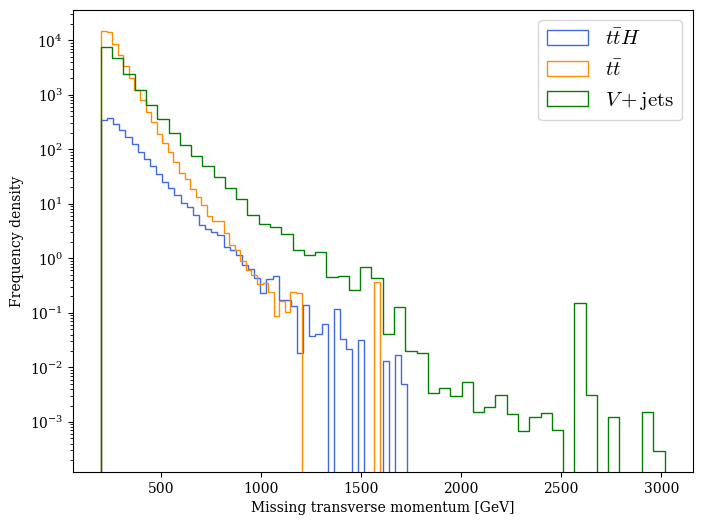

In [ ]:
# Plot the histogram of the number of jets of each class

# Use LaTeX-style fonts without requiring a LaTeX installation
plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

# plt.style.use('science')
# bins=10
plt.figure(figsize=(8, 6), dpi=100)

plt.hist(df[df['class'] == 0]['InputMet_pt'], bins=50, linewidth=1, color='royalblue', label= r'$t\bar{t}H$', histtype='step', weights = df[df['class'] == 0]['weight_nominal']*200000)
plt.hist(df[df['class'] == 1]['InputMet_pt'], bins=50, linewidth=1, color='darkorange', label= r'$t\bar{t}$', histtype='step', weights = df[df['class'] == 1]['weight_nominal']*200000)
plt.hist(df[df['class'] == 2]['InputMet_pt'], bins=50, linewidth=1, color='g', label= r'$V + \text{jets}$', histtype='step', weights = df[df['class'] == 2]['weight_nominal']*200000)

# plt.yscale('log')
plt.xlabel('Missing transverse momentum [GeV]')
plt.ylabel('Frequency density')
plt.yscale('log')
# plt.xscale('log')
# plt.xlim(100, 1000)
# plt.ylim(0.1, 100000)
plt.legend(fontsize = 15)


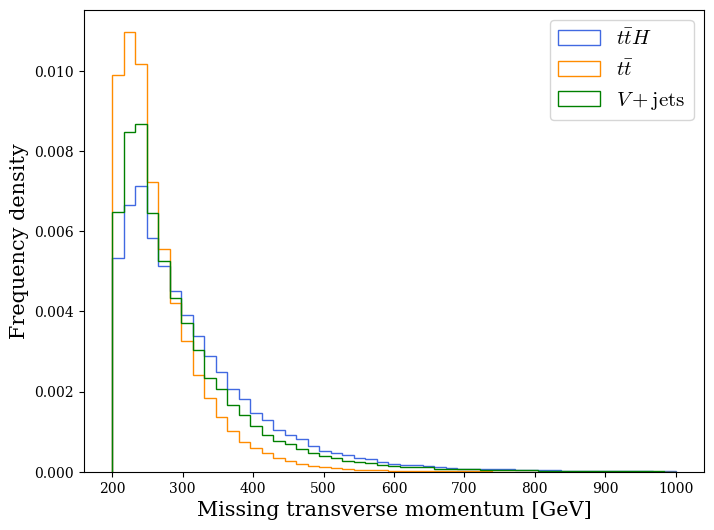

In [ ]:
# Plot the histogram of the number of jets of each class

# Use LaTeX-style fonts without requiring a LaTeX installation
plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

bin_edges = np.linspace(200, 1000, 50)  # 50 bins from 100 to 1000 GeV

plt.figure(figsize=(8, 6), dpi=100)

plt.hist(df[df['class'] == 0]['InputMet_pt'], bins=bin_edges, linewidth=1, color='royalblue', label= r'$t\bar{t}H$', histtype='step', weights = df[df['class'] == 0]['weight_nominal']*200000 ,density=True)
plt.hist(df[df['class'] == 1]['InputMet_pt'], bins=bin_edges, linewidth=1, color='darkorange', label= r'$t\bar{t}$', histtype='step', weights = df[df['class'] == 1]['weight_nominal']*200000,density=True)
plt.hist(df[df['class'] == 2]['InputMet_pt'], bins=bin_edges, linewidth=1, color='g', label= r'$V + \text{jets}$', histtype='step', weights = df[df['class'] == 2]['weight_nominal']*200000,density=True)

# plt.yscale('log')
plt.xlabel('Missing transverse momentum [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize= 15)
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(100, 1000)
# plt.ylim(0.1, 100000)
plt.legend(fontsize = 15)


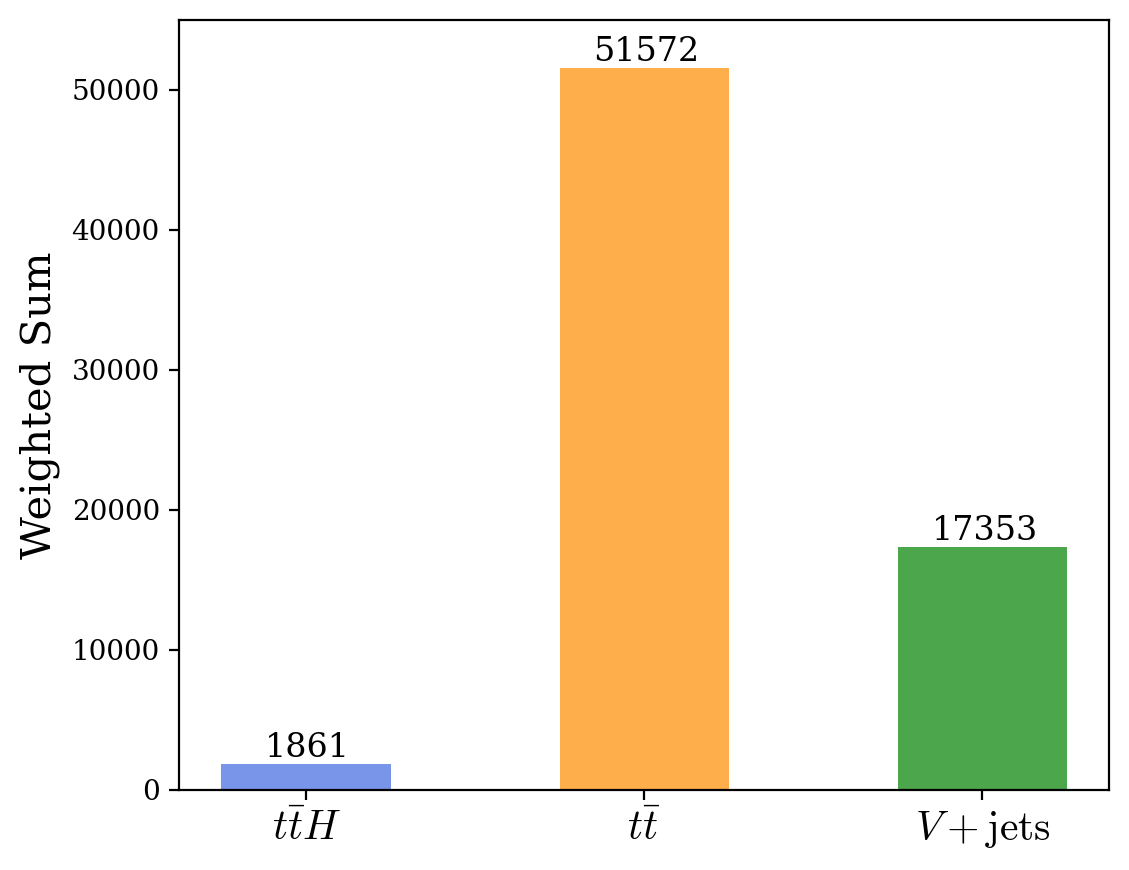

In [ ]:
# Compute weights
wttH = df['weight_nominal'][df['class'] == 0].sum() * 200000
wtt = df['weight_nominal'][df['class'] == 1].sum()* 200000
wz = df['weight_nominal'][df['class'] == 2].sum()* 200000

# Bar plot
bar_positions = [0, 1, 2]
bar_values = [wttH, wtt, wz]
bar_colors = ['royalblue', 'darkorange', 'g']

plt.figure(figsize=(6, 5), dpi=200)
plt.bar(bar_positions, bar_values, color=bar_colors, width =0.5, alpha=0.7)

# Set x-ticks
plt.xticks(bar_positions, [r'$t\bar{t}H$', r'$t\bar{t}$', r'$V + \text{jets}$'] , fontsize=15)
# plt.yticks(fontsize=15)

plt.text(-0.12, wttH+500, f'{wttH:.0f}', fontsize=12)
plt.text(0.85, wtt + 500, f'{wtt:.0f}', fontsize=12)
plt.text(1.85, wz + 500, f'{wz:.0f}', fontsize=12)
plt.ylim(0, 55000)


plt.ylabel("Weighted Sum", fontsize=15)
plt.show()


# Features plot

In [ ]:
# ttH_pt = df[df['class'] == 0]['cleanedJet_pt'].apply(lambda x: x[0])
# tt_pt = df[df['class'] == 1]['cleanedJet_pt'].apply(lambda x: x[0])
# Vjets_pt = df[df['class'] == 2]['cleanedJet_pt'].apply(lambda x: x[0])

ttH_pt = df[df['class'] == 0]['cleanedJet_pt'].explode()
tt_pt = df[df['class'] == 1]['cleanedJet_pt'].explode()
Vjets_pt = df[df['class'] == 2]['cleanedJet_pt'].explode()

ttH_weights_expanded = np.repeat(df[df['class']==0]['weight_nominal'].values, df[df['class']==0]['cleanedJet_pt'].str.len())
tt_weights_expanded = np.repeat(df[df['class']==1]['weight_nominal'].values, df[df['class']==1]['cleanedJet_pt'].str.len())
Vjets_weights_expanded = np.repeat(df[df['class']==2]['weight_nominal'].values, df[df['class']==2]['cleanedJet_pt'].str.len())


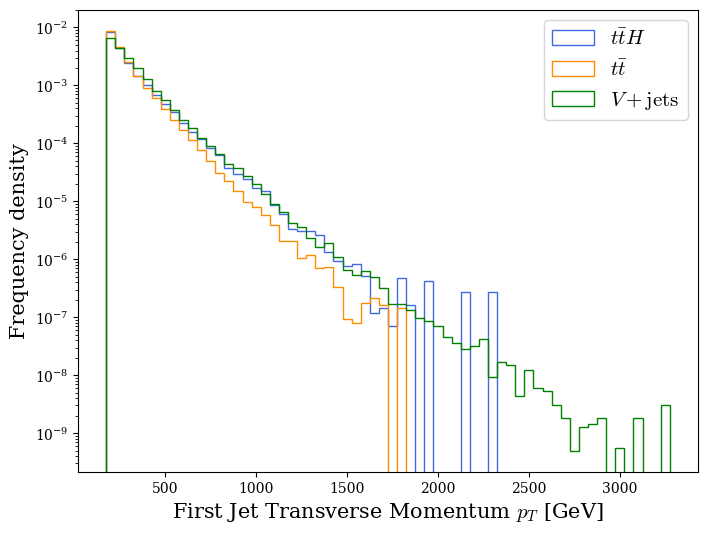

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.linspace(175, 3275, 63)

plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

# plt.hist(ttH_pt, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = df[df['class'] == 0]['weight_nominal']*200000)
# plt.hist(tt_pt, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = df[df['class'] == 1]['weight_nominal']*200000)
# plt.hist(Vjets_pt, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = df[df['class'] == 2]['weight_nominal']*200000)

plt.hist(ttH_pt, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, linewidth=1)
plt.hist(tt_pt, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, linewidth=1)
plt.hist(Vjets_pt, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, linewidth=1)


plt.xlabel('First Jet Transverse Momentum $p_T$ [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)
# plt.ylim(1e-5, 1e-1)
# plt.xlim(0, 1000)
# plt.xscale('log')
plt.show()

In [ ]:
# ttH_eta = df[df['class'] == 0]['cleanedJet_eta'].apply(lambda x: x[0])
# tt_eta = df[df['class'] == 1]['cleanedJet_eta'].apply(lambda x: x[0])
# Vjets_eta = df[df['class'] == 2]['cleanedJet_eta'].apply(lambda x: x[0])

ttH_eta = df[df['class'] == 0]['cleanedJet_eta'].explode()
tt_eta = df[df['class'] == 1]['cleanedJet_eta'].explode()
Vjets_eta = df[df['class'] == 2]['cleanedJet_eta'].explode()

print(Vjets_eta.min())
print(Vjets_eta.max())

-4.8710938
4.890625


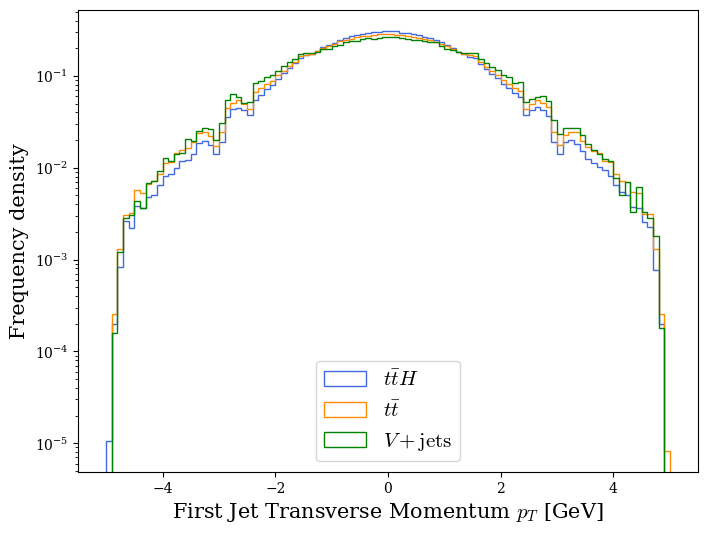

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.linspace(-5, 5, 101)

plt.hist(ttH_eta, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(tt_eta, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(Vjets_eta, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)


plt.xlabel('First Jet Transverse Momentum $p_T$ [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.show()

In [ ]:
ttH_btag = df[df['class'] == 0]['cleanedJet_btagDeepFlavB'].explode()
tt_btag = df[df['class'] == 1]['cleanedJet_btagDeepFlavB'].explode()
Vjets_btag = df[df['class'] == 2]['cleanedJet_btagDeepFlavB'].explode()

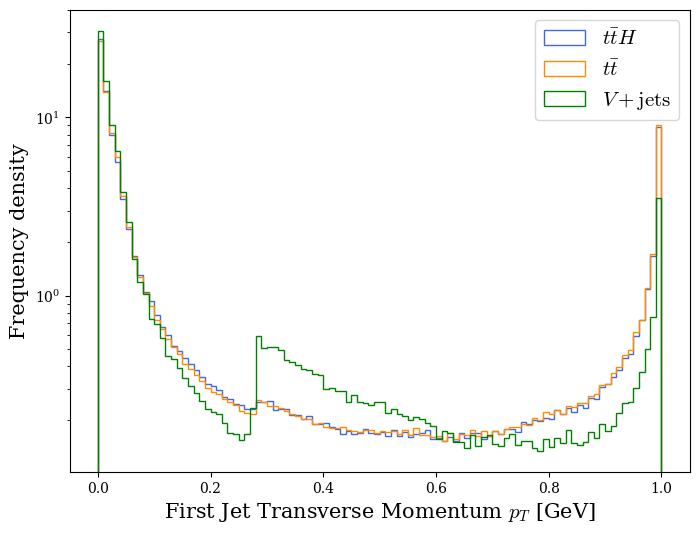

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.linspace(0, 1, 101)

plt.hist(ttH_btag, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(tt_btag, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(Vjets_btag, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)


plt.xlabel('First Jet Transverse Momentum $p_T$ [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.show()

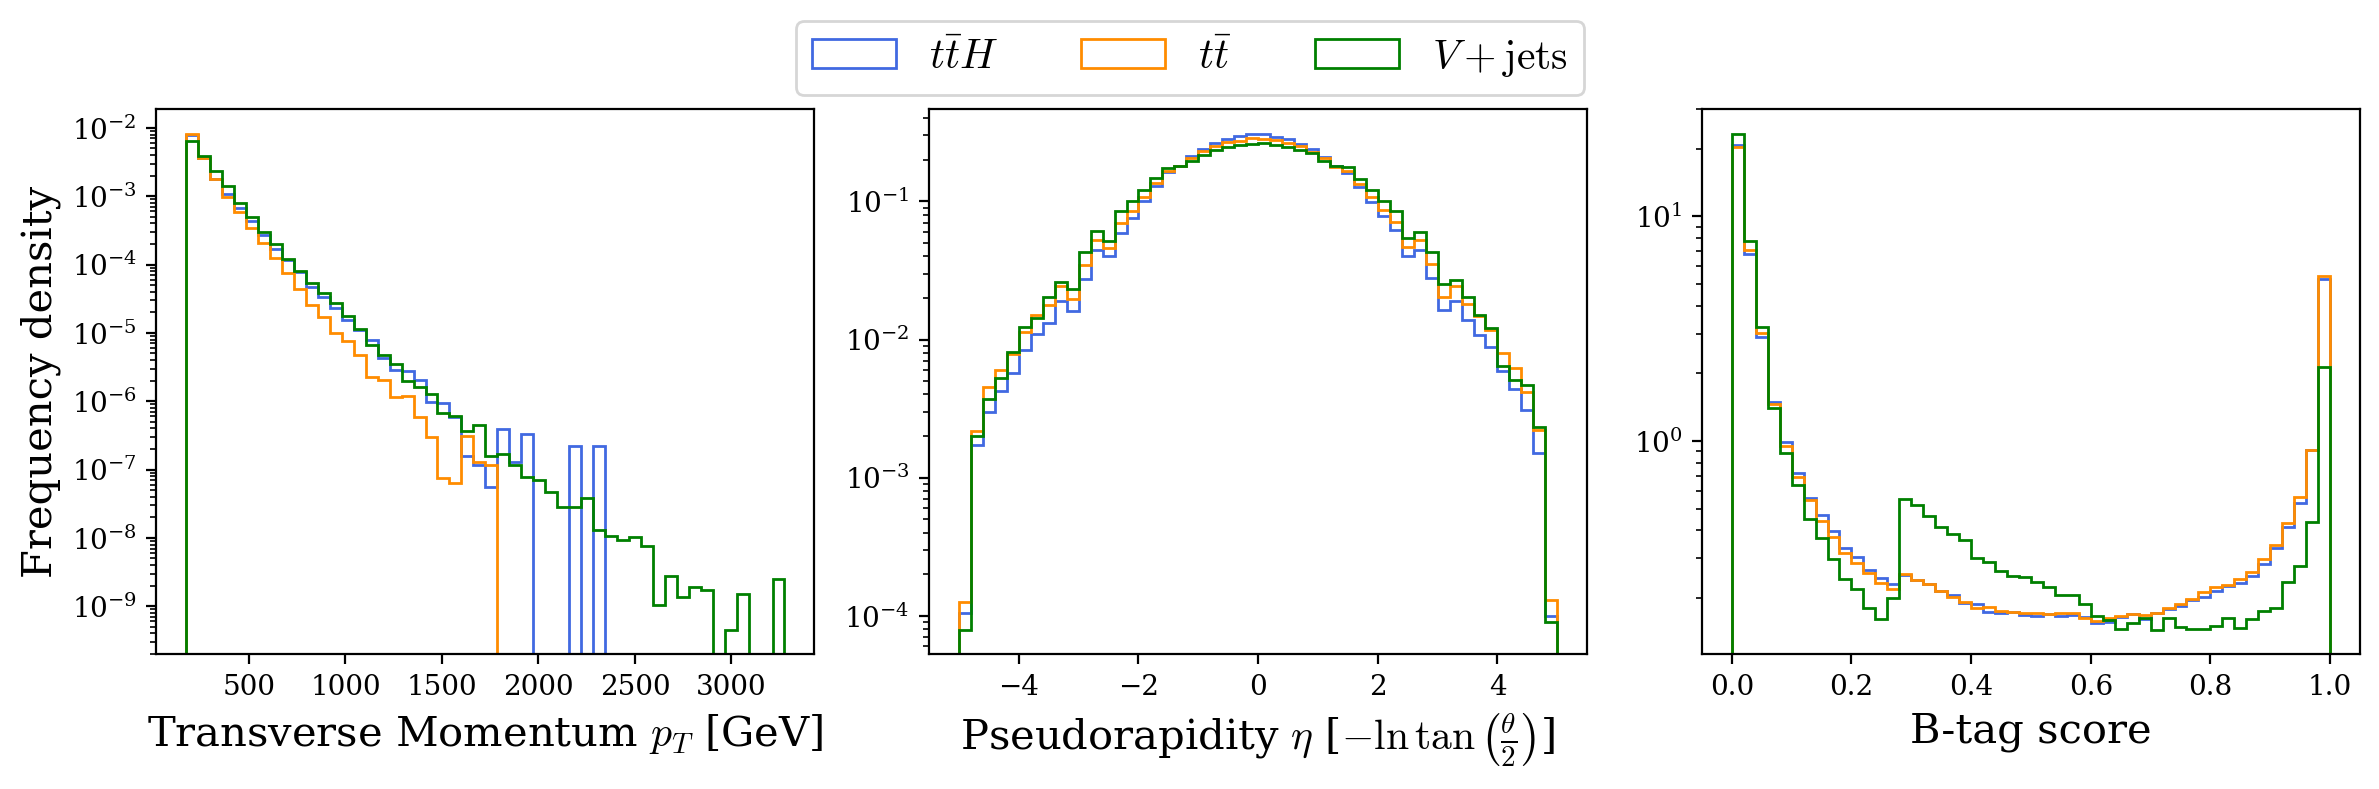

In [ ]:
# Now plot together

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

bins = np.linspace(175, 3275, 51)

axs[0].hist(ttH_pt, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, linewidth=1)
axs[0].hist(tt_pt, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, linewidth=1)
axs[0].hist(Vjets_pt, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, linewidth=1)

axs[0].set_xlabel('Transverse Momentum $p_T$ [GeV]', fontsize=15)
axs[0].set_ylabel('Frequency density', fontsize=15)
axs[0].set_yscale('log')

bins = np.linspace(-5, 5, 51)

axs[1].hist(ttH_eta, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
axs[1].hist(tt_eta, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
axs[1].hist(Vjets_eta, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)

axs[1].set_xlabel(r'Pseudorapidity $\eta$ [$-\ln \tan \left(\frac{\theta}{2} \right)$]', fontsize=15)
axs[1].set_yscale('log')

bins = np.linspace(0, 1, 51)

axs[2].hist(ttH_btag, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
axs[2].hist(tt_btag, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
axs[2].hist(Vjets_btag, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)

axs[2].set_xlabel('B-tag score', fontsize=15)
axs[2].set_yscale('log')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()



<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2124855/1070162285.py:34: SyntaxWarning: invalid escape sequence '\s'
  ax1.axvline(x=5, linestyle='--', color='red', linewidth=1.5, label='5$\sigma$ threshold')


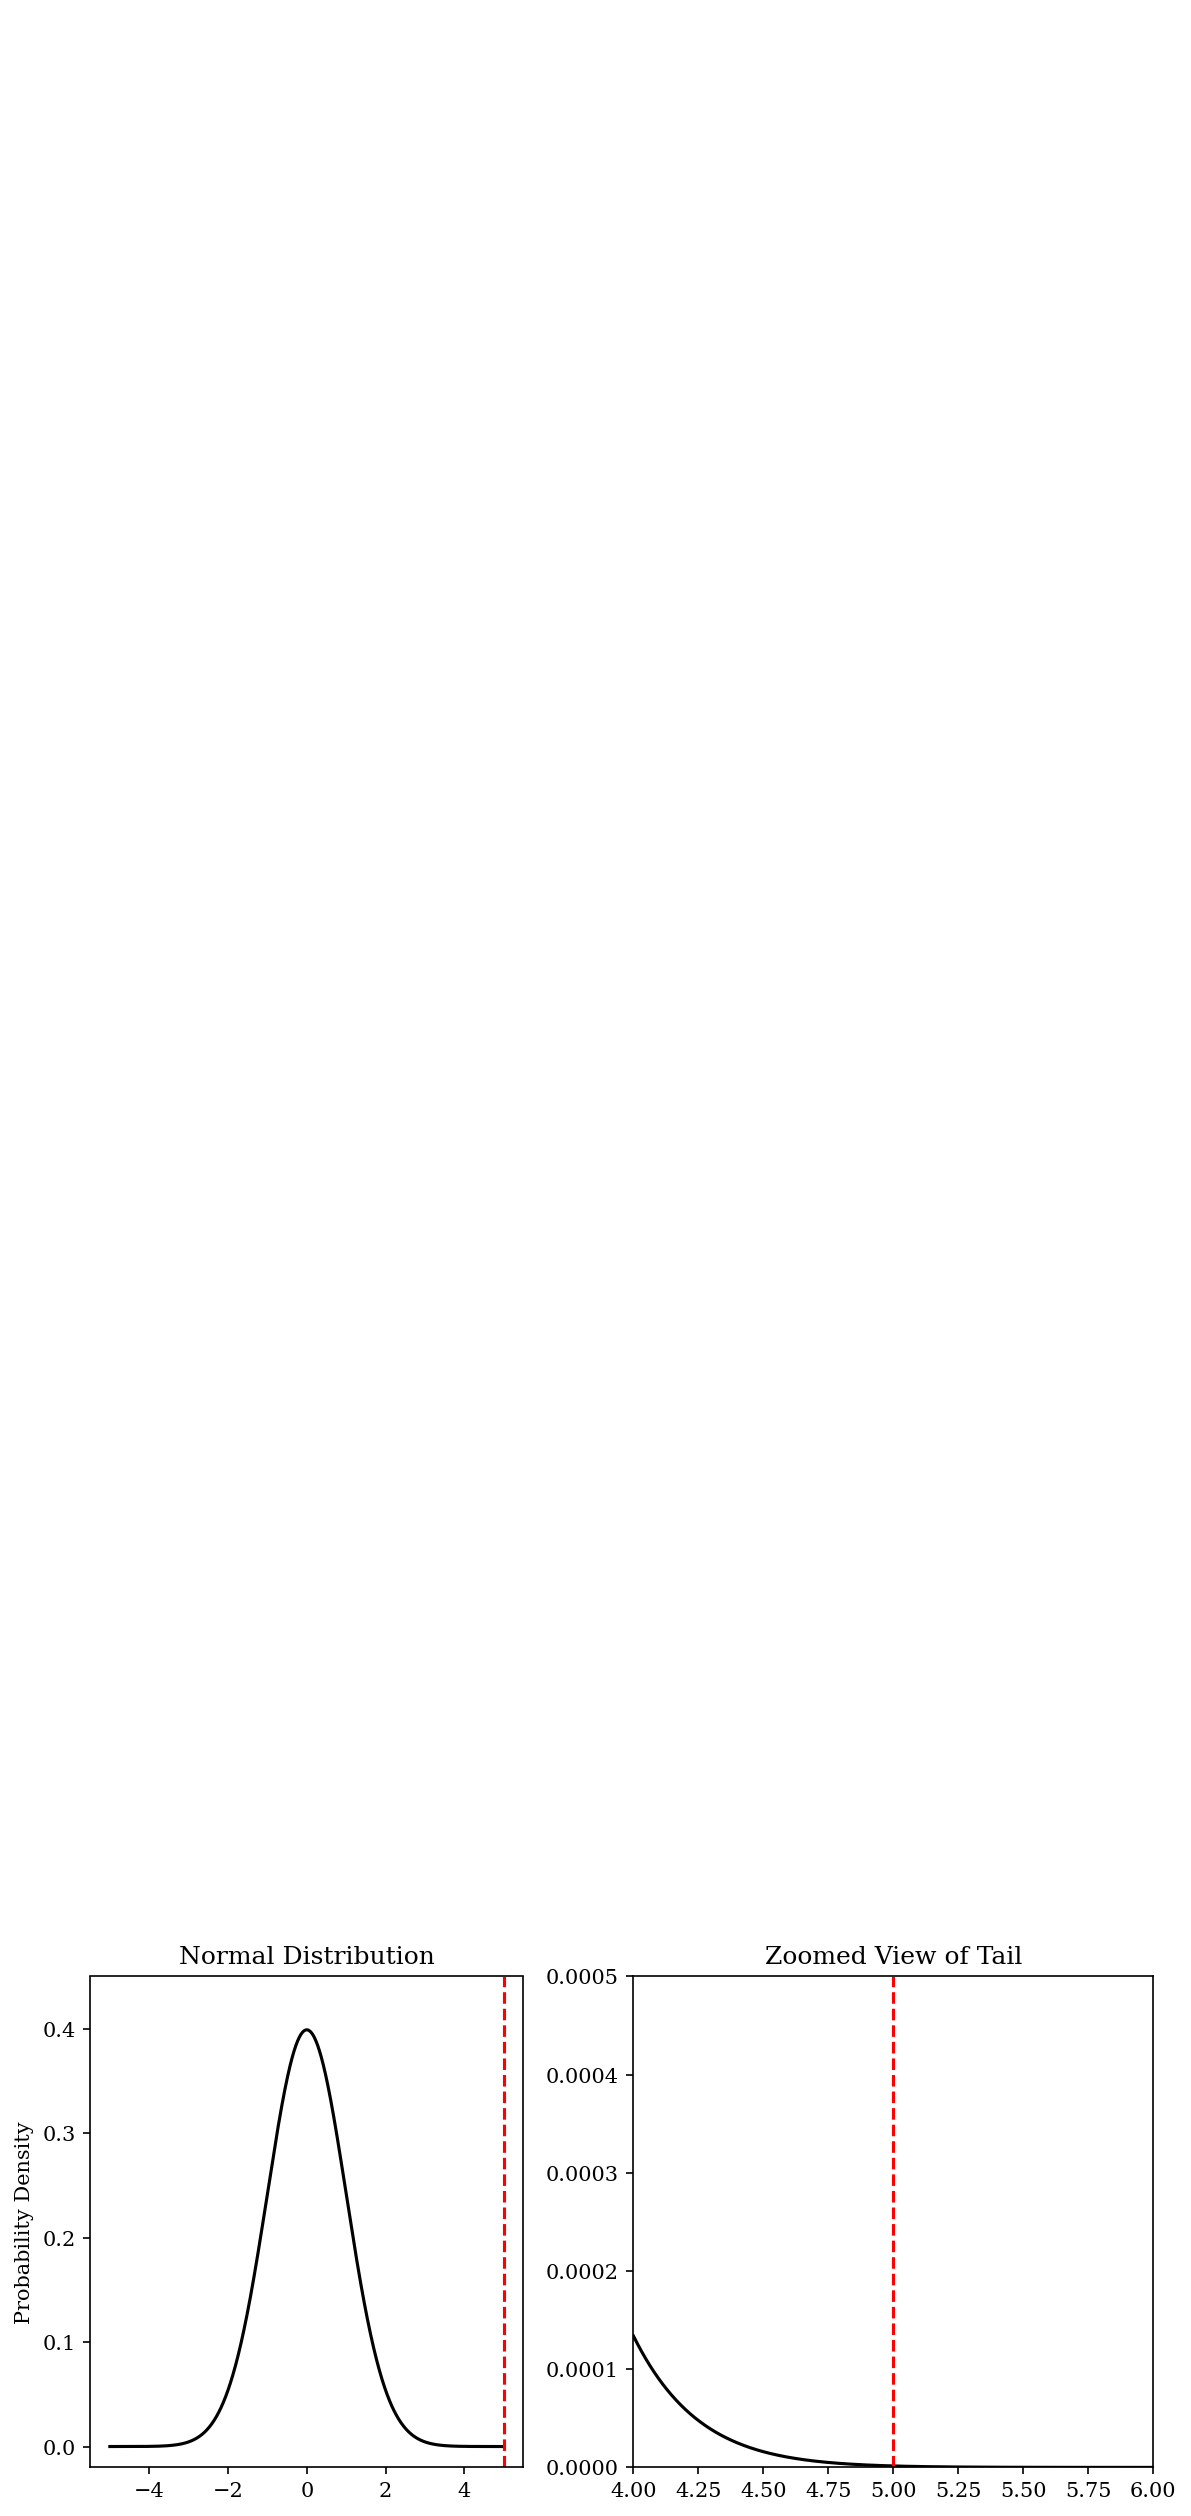

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.gridspec as gridspec
from matplotlib import patches

# Configure plot aesthetics
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'mathtext.fontset': 'dejavuserif'
})

# Create figure with custom layout
fig = plt.figure(figsize=(8, 4), dpi=150)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2])

# First subplot - Full normal distribution
ax1 = plt.subplot(gs[0])
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)

ax1.plot(x, y, 'k-', linewidth=1.5, label='Normal Distribution')
ax1.fill_between(x, y, where=(x <= -5) | (x >= 5), color='red', alpha=0.3)

# Add vertical lines for sigma values
# sigmas = np.arange(-3, 4)
# for sigma in sigmas:
#     ax1.axvline(x=sigma, linestyle=':', color='gray', linewidth=0.5)
#     if sigma != 0:
#         ax1.text(sigma, -0.01, f'{sigma}$\sigma$', ha='center', va='top')

# Highlight 5 sigma threshold
ax1.axvline(x=5, linestyle='--', color='red', linewidth=1.5, label=r'5$\sigma$ threshold')
# Set axis labels and limits
ax1.set_xlim(-5.5, 5.5)
ax1.set_ylim(-0.02, 0.45)
ax1.set_ylabel('Probability Density')
ax1.set_title('Normal Distribution')

# Second subplot - Zoomed-in tail view
ax2 = plt.subplot(gs[1])
x_zoom = np.linspace(4, 6, 1000)
y_zoom = norm.pdf(x_zoom)

ax2.plot(x_zoom, y_zoom, 'k-', linewidth=1.5)
ax2.fill_between(x_zoom, y_zoom, where=(x_zoom >= 5), color='red', alpha=0.3)
ax2.axvline(x=5, linestyle='--', color='red', linewidth=1.5)

# Set axis labels and limits
ax2.set_xlim(4, 6)
ax2.set_ylim(0, 0.0005)
ax2.set_title('Zoomed View of Tail')

# Connect the plots with an arrow
con = patches.ConnectionPatch(xyA=(5, 0.25), xyB=(3, 0.0025), 
                              coordsA="data", coordsB="data",
                              axesA=ax1, axesB=ax2, 
                              arrowstyle="->", linewidth=1.5, color='blue')
fig.add_artist(con)

# Adjust layout and add title
plt.tight_layout()
# plt.subplots_adjust(top=0.85)

# Add legend
# ax1.legend(loc='upper right', framealpha=0.9)

# Save and display plot
plt.savefig('five_sigma_threshold.png', dpi=300, bbox_inches='tight')
plt.show()
